In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import sys
import cv2
import torch
import pydicom
import numpy as np
import matplotlib.pyplot as plt

from segment_anything import sam_model_registry, SamPredictor

sys.path.append("..")

In [4]:
sam_checkpoint = "z://CT_multi-phase/SAM/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [5]:
dcm_path = 'z://CT_multi-phase/data/0121546/3st/FILE0026.dcm'
dcm_data = pydicom.read_file(dcm_path)
img = dcm_data.pixel_array

In [6]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=50):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=0.5)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=0.5)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

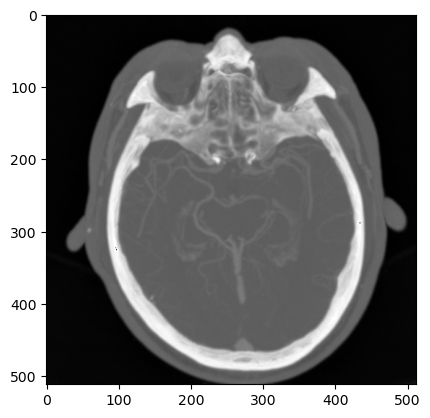

In [7]:
dcm_data = pydicom.read_file(dcm_path)
img = dcm_data.pixel_array

def min_max_scaling(img):
    img = img / (img.max() - img.min())
    return img

img = min_max_scaling(img) *256
img = np.ceil(img).astype((np.uint8))

plt.imshow(img, cmap='gray')
plt.show()

image = np.expand_dims(img, axis=2)
image = np.repeat(image, 3, axis=2)
predictor.set_image(image)

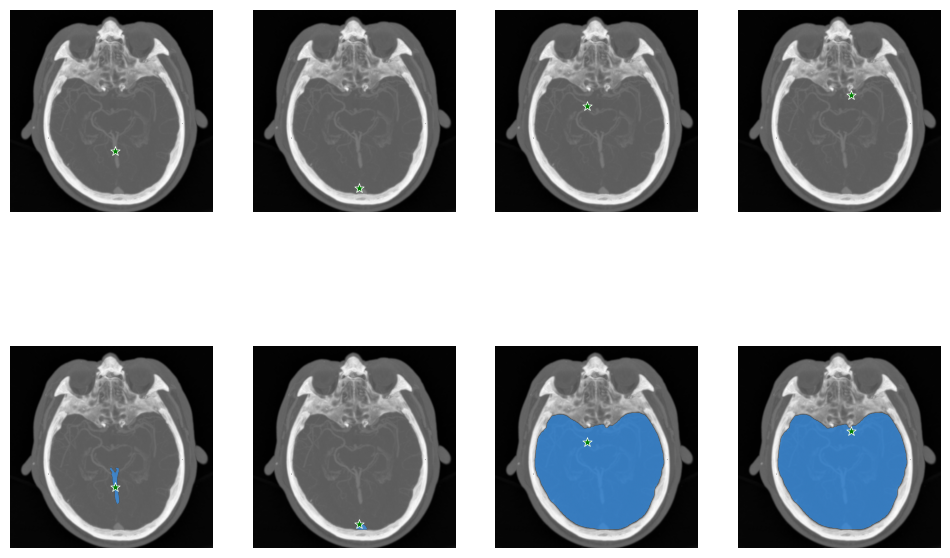

In [8]:
input_point1 = np.array([[265, 356]])
input_point2 = np.array([[270, 450]])
input_point3 = np.array([[231, 242]])
input_point4 = np.array([[285, 215]])
input_label = np.array([1])

masks1, _, _ = predictor.predict(point_coords=input_point1, point_labels=input_label, multimask_output=True,)
masks2, _, _ = predictor.predict(point_coords=input_point2, point_labels=input_label,multimask_output=True,)
masks3, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)
masks4, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)

plt.figure(figsize=(12,8))

plt.subplot(241)
plt.imshow(image)
show_points(input_point1, input_label, plt.gca())
plt.axis(False)
plt.subplot(245)
plt.imshow(image)
show_mask(masks1[0], plt.gca())
show_points(input_point1, input_label, plt.gca())
plt.axis(False)

plt.subplot(242)
plt.imshow(image)
show_points(input_point2, input_label, plt.gca())
plt.axis(False)
plt.subplot(246)
plt.imshow(image)
show_mask(masks2[0], plt.gca())
show_points(input_point2, input_label, plt.gca())
plt.axis(False)

plt.subplot(243)
plt.imshow(image)
show_points(input_point3, input_label, plt.gca())
plt.axis(False)
plt.subplot(247)
plt.imshow(image)
show_mask(masks3[0], plt.gca())
show_points(input_point3, input_label, plt.gca())
plt.axis(False)

plt.subplot(244)
plt.imshow(image)
show_points(input_point4, input_label, plt.gca())
plt.axis(False)
plt.subplot(248)
plt.imshow(image)
show_mask(masks4[0], plt.gca())
show_points(input_point4, input_label, plt.gca())
plt.axis(False)

plt.show() 

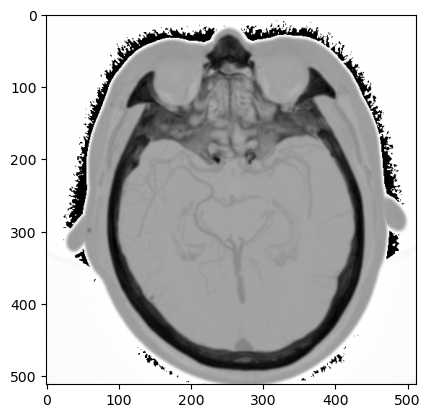

In [9]:
dcm_data = pydicom.read_file(dcm_path)
img = dcm_data.pixel_array

def min_max_scaling(img):
    img = img / (img.max() - img.min())
    return img

img = min_max_scaling(img)*256
img = np.ceil(img).astype((np.uint8))
img = (img - img.min())*255/(img.max()-img.min())*256
img = np.ceil(img).astype((np.uint8))

plt.imshow(img, cmap='gray')
plt.show()

image = np.expand_dims(img, axis=2)
image = np.repeat(image, 3, axis=2)
predictor.set_image(image)

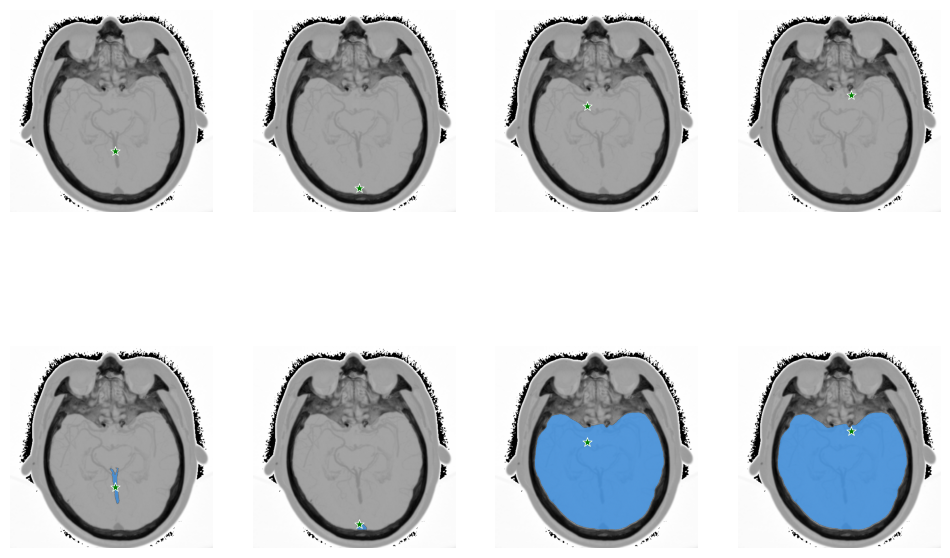

In [10]:
input_point1 = np.array([[265, 356]])
input_point2 = np.array([[270, 450]])
input_point3 = np.array([[231, 242]])
input_point4 = np.array([[285, 215]])
input_label = np.array([1])

masks1, _, _ = predictor.predict(point_coords=input_point1, point_labels=input_label, multimask_output=True,)
masks2, _, _ = predictor.predict(point_coords=input_point2, point_labels=input_label,multimask_output=True,)
masks3, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)
masks4, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)

plt.figure(figsize=(12,8))

plt.subplot(241)
plt.imshow(image)
show_points(input_point1, input_label, plt.gca())
plt.axis(False)
plt.subplot(245)
plt.imshow(image)
show_mask(masks1[0], plt.gca())
show_points(input_point1, input_label, plt.gca())
plt.axis(False)

plt.subplot(242)
plt.imshow(image)
show_points(input_point2, input_label, plt.gca())
plt.axis(False)
plt.subplot(246)
plt.imshow(image)
show_mask(masks2[0], plt.gca())
show_points(input_point2, input_label, plt.gca())
plt.axis(False)

plt.subplot(243)
plt.imshow(image)
show_points(input_point3, input_label, plt.gca())
plt.axis(False)
plt.subplot(247)
plt.imshow(image)
show_mask(masks3[0], plt.gca())
show_points(input_point3, input_label, plt.gca())
plt.axis(False)

plt.subplot(244)
plt.imshow(image)
show_points(input_point4, input_label, plt.gca())
plt.axis(False)
plt.subplot(248)
plt.imshow(image)
show_mask(masks4[0], plt.gca())
show_points(input_point4, input_label, plt.gca())
plt.axis(False)

plt.show() 

In [11]:
def min_max_scaling(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

C:\Users\User\AppData\Local\Temp\ipykernel_11284\1448061764.py:33: RuntimeWarning: divide by zero encountered in log
  img_1st = abs(-np.log(img_1st))
C:\Users\User\AppData\Local\Temp\ipykernel_11284\1448061764.py:34: RuntimeWarning: divide by zero encountered in log
  img_2st = abs(-np.log(img_2st))
C:\Users\User\AppData\Local\Temp\ipykernel_11284\1448061764.py:35: RuntimeWarning: divide by zero encountered in log
  img_3st = abs(-np.log(img_3st))


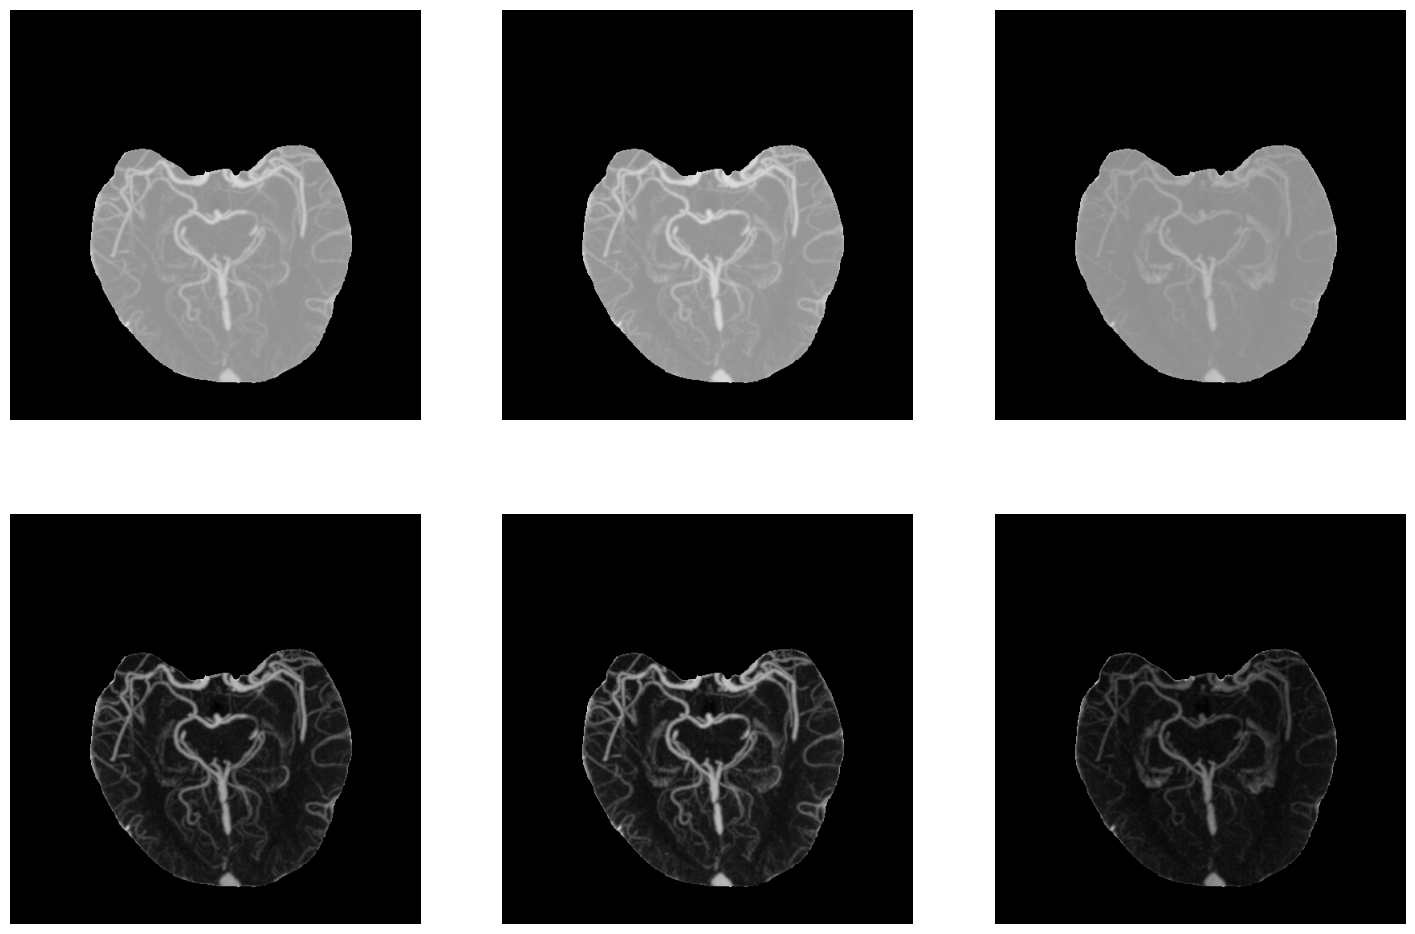

In [14]:
dcm_path_1st = 'z://CT_multi-phase/data/0121546/1st/FILE0026.dcm'
dcm_path_2st = 'z://CT_multi-phase/data/0121546/2st/FILE0026.dcm'
dcm_path_3st = 'z://CT_multi-phase/data/0121546/3st/FILE0026.dcm'

dcm_data_1st = pydicom.read_file(dcm_path_1st)
dcm_data_2st = pydicom.read_file(dcm_path_2st)
dcm_data_3st = pydicom.read_file(dcm_path_3st)

img_1st = dcm_data_1st.pixel_array
img_2st = dcm_data_2st.pixel_array
img_3st = dcm_data_3st.pixel_array

img_1st[masks4[0]==False]=0
img_2st[masks4[0]==False]=0
img_3st[masks4[0]==False]=0

plt.figure(figsize=(18,12))

plt.subplot(231)
plt.imshow(img_1st, cmap='gray')
plt.axis(False)
plt.subplot(232)
plt.imshow(img_2st, cmap='gray')
plt.axis(False)
plt.subplot(233)
plt.imshow(img_3st, cmap='gray')
plt.axis(False)

img_1st[img_1st<0] = 0
img_2st[img_2st<0] = 0
img_3st[img_3st<0] = 0

img_1st = abs(-np.log(img_1st))
img_2st = abs(-np.log(img_2st))
img_3st = abs(-np.log(img_3st))

img_1st[img_1st==np.inf] = img_1st.min()
img_2st[img_2st==np.inf] = img_2st.min()
img_3st[img_3st==np.inf] = img_3st.min()

img_1st = min_max_scaling(img_1st)
img_2st = min_max_scaling(img_2st)
img_3st = min_max_scaling(img_3st)


plt.subplot(234)
plt.imshow(img_1st, cmap='gray')
plt.axis(False)
plt.subplot(235)
plt.imshow(img_2st, cmap='gray')
plt.axis(False)
plt.subplot(236)
plt.imshow(img_3st, cmap='gray')
plt.axis(False)
plt.show()

In [15]:
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

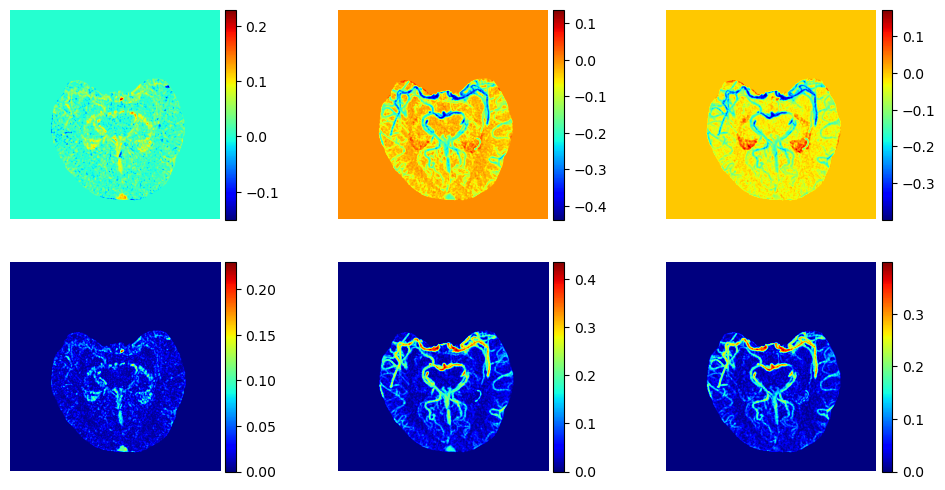

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(231)
im = plt.imshow((img_2st-img_1st), cmap='jet')
plt.axis(False)
add_colorbar(im)
plt.subplot(232)
im = plt.imshow((img_3st-img_2st), cmap='jet')
plt.axis(False)
add_colorbar(im)
plt.subplot(233)
im = plt.imshow((img_3st-img_1st), cmap='jet')
plt.axis(False)
add_colorbar(im)

plt.subplot(234)
im = plt.imshow(np.abs(img_2st-img_1st), cmap='jet')
plt.axis(False)
add_colorbar(im)
plt.subplot(235)
im = plt.imshow(np.abs(img_3st-img_2st), cmap='jet')
plt.axis(False)
add_colorbar(im)
plt.subplot(236)
im = plt.imshow(np.abs(img_3st-img_1st), cmap='jet')
plt.axis(False)
add_colorbar(im)
plt.show()

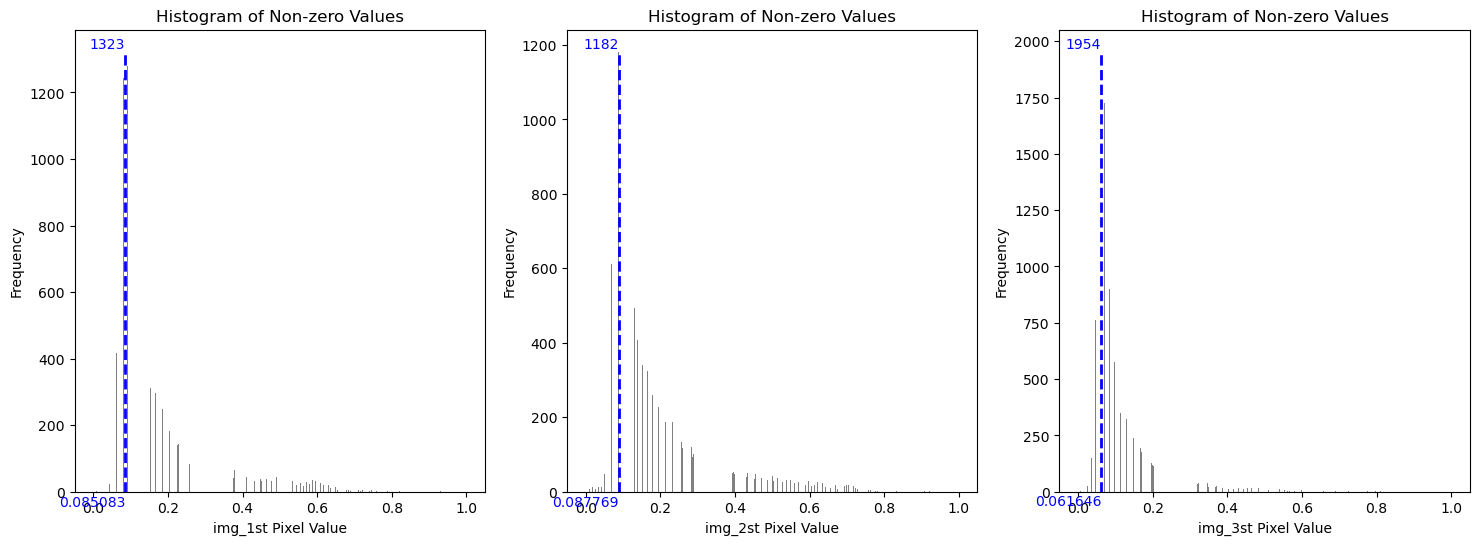

In [17]:
k= 4096


# 히스토그램 플롯
plt.figure(figsize=(18, 6))

plt.subplot(131)
non_zero_values = img_1st[img_1st != 0]
histogram, bins = np.histogram(non_zero_values, bins=k, range=(0, 1))
max_index = np.argmax(histogram)
max_value = histogram[max_index]
max_bin_center = (bins[max_index] + bins[max_index + 1]) / 2
plt.bar(bins[:-1], histogram, width=(1/k), color='gray')  # 각 구간의 너비를 조절
plt.plot([max_bin_center, max_bin_center], [0, max_value], color='blue', linestyle='--', linewidth=2)
plt.text(max_bin_center, max_value, f'{max_value}', horizontalalignment='right', verticalalignment='bottom', color='blue')
plt.text(max_bin_center, -10, f'{max_bin_center:f}', horizontalalignment='right', verticalalignment='top', color='blue')
plt.title('Histogram of Non-zero Values')
plt.xlabel('img_1st Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
non_zero_values = img_2st[img_2st != 0]
histogram, bins = np.histogram(non_zero_values, bins=k, range=(0, 1))
max_index = np.argmax(histogram)
max_value = histogram[max_index]
max_bin_center = (bins[max_index] + bins[max_index + 1]) / 2
plt.bar(bins[:-1], histogram, width=(1/k), color='gray')  # 각 구간의 너비를 조절
plt.plot([max_bin_center, max_bin_center], [0, max_value], color='blue', linestyle='--', linewidth=2)
plt.text(max_bin_center, max_value, f'{max_value}', horizontalalignment='right', verticalalignment='bottom', color='blue')
plt.text(max_bin_center, -10, f'{max_bin_center:f}', horizontalalignment='right', verticalalignment='top', color='blue')
plt.title('Histogram of Non-zero Values')
plt.xlabel('img_2st Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
non_zero_values = img_3st[img_3st != 0]
histogram, bins = np.histogram(non_zero_values, bins=k, range=(0, 1))
max_index = np.argmax(histogram)
max_value = histogram[max_index]
max_bin_center = (bins[max_index] + bins[max_index + 1]) / 2
plt.bar(bins[:-1], histogram, width=(1/k), color='gray')  # 각 구간의 너비를 조절
plt.plot([max_bin_center, max_bin_center], [0, max_value], color='blue', linestyle='--', linewidth=2)
plt.text(max_bin_center, max_value, f'{max_value}', horizontalalignment='right', verticalalignment='bottom', color='blue')
plt.text(max_bin_center, -10, f'{max_bin_center:f}', horizontalalignment='right', verticalalignment='top', color='blue')
plt.title('Histogram of Non-zero Values')
plt.xlabel('img_3st Pixel Value')
plt.ylabel('Frequency')

plt.show()


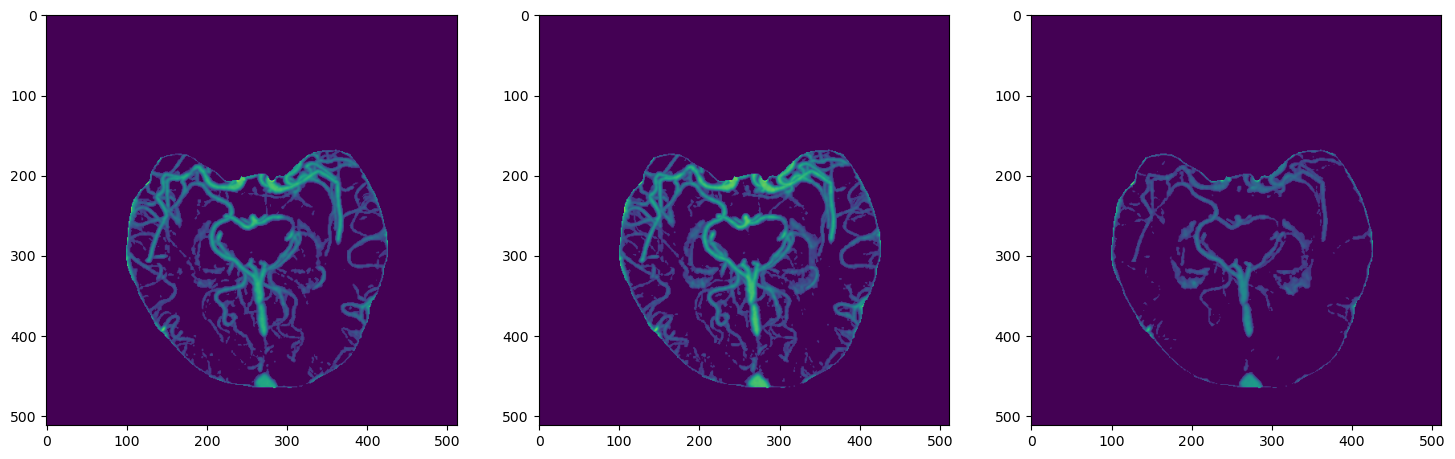

In [18]:
k = 0.15

plt.figure(figsize=(18, 6))

a = img_1st.copy()
a[a<k]=0
plt.subplot(131)
plt.imshow(a)

a = img_2st.copy()
a[a<k]=0
plt.subplot(132)
plt.imshow(a)

a = img_3st.copy()
a[a<k]=0
plt.subplot(133)
plt.imshow(a)